In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [ ]:
print(data.head())


   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

**Pre-Processing**

In [ ]:
# Step 1: Check for missing values
missing_values = data.isnull().sum()

# Step 2: Encode categorical variables
label_encoders = {}
label_encoders['Gender'] = LabelEncoder()
data['Gender'] = label_encoders['Gender'].fit_transform(data['Gender'])
label_encoders['Membership Type'] = LabelEncoder()
data['Membership Type'] = label_encoders['Membership Type'].fit_transform(data['Membership Type'])
label_encoders['Satisfaction Level'] = LabelEncoder()
data['Satisfaction Level'] = label_encoders['Satisfaction Level'].fit_transform(data['Satisfaction Level'])

# Step 3: Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Step 4: One-hot encode city column
data = pd.get_dummies(data, columns=['City'], drop_first=True)

# Step 5: Separate features and target
X = data.drop(['Customer ID', 'Satisfaction Level'], axis=1)
y = data['Satisfaction Level']

# Step 6: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Basic statistics of the dataset:
       Customer ID      Gender         Age  Membership Type  Total Spend  \
count   350.000000  350.000000  350.000000       350.000000   350.000000   
mean    275.500000    0.500000    0.446891         1.002857     0.391762   
std     101.180532    0.500716    0.286522         0.817076     0.326385   
min     101.000000    0.000000    0.000000         0.000000     0.000000   
25%     188.250000    0.000000    0.235294         0.000000     0.082214   
50%     275.500000    0.500000    0.382353         1.000000     0.328495   
75%     362.750000    1.000000    0.647059         2.000000     0.675922   
max     450.000000    1.000000    1.000000         2.000000     1.000000   

       Items Purchased  Average Rating  Days Since Last Purchase  \
count       350.000000      350.000000                350.000000   
mean          0.400000        0.536391                  0.325714   
std           0.296856        0.305547                  0.248904   
min       

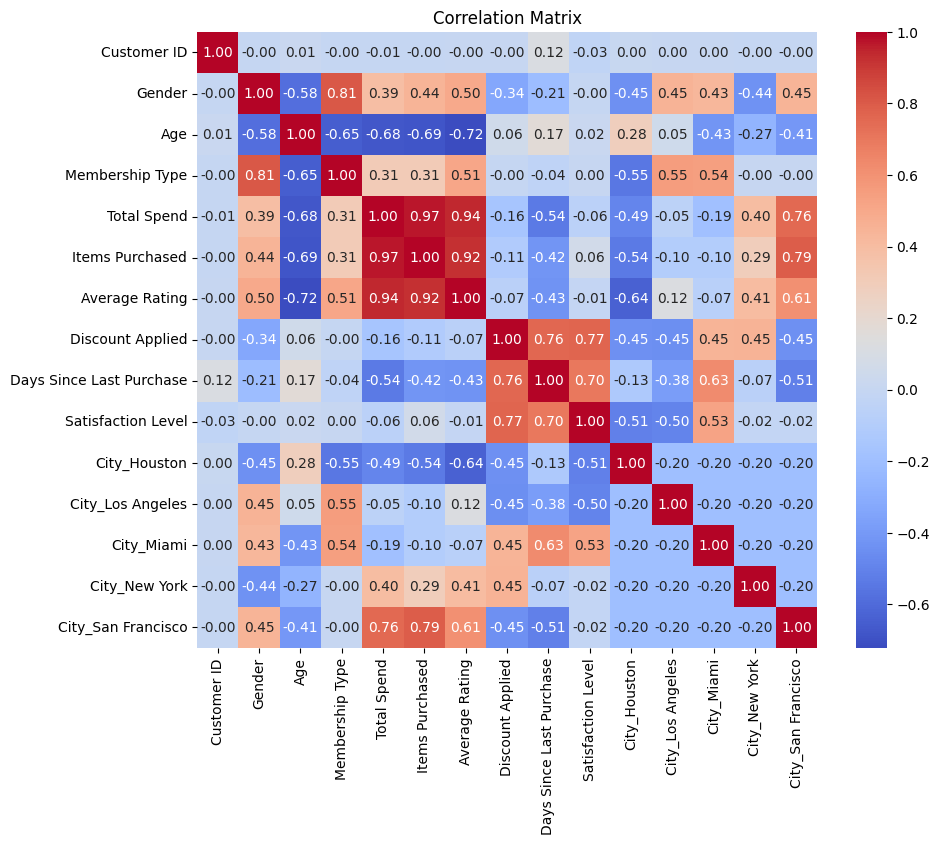


Distribution of Satisfaction Level:


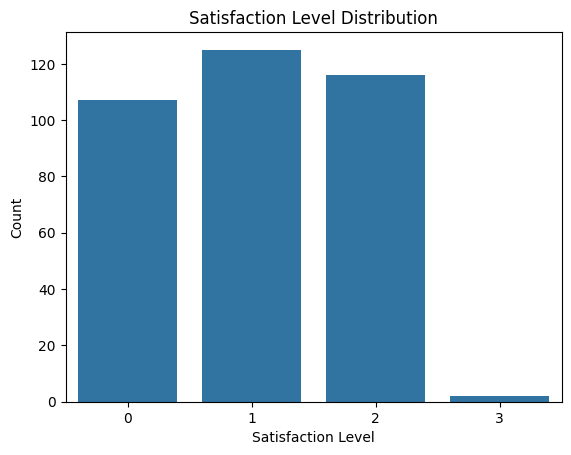


Visualizing distribution of numerical features...


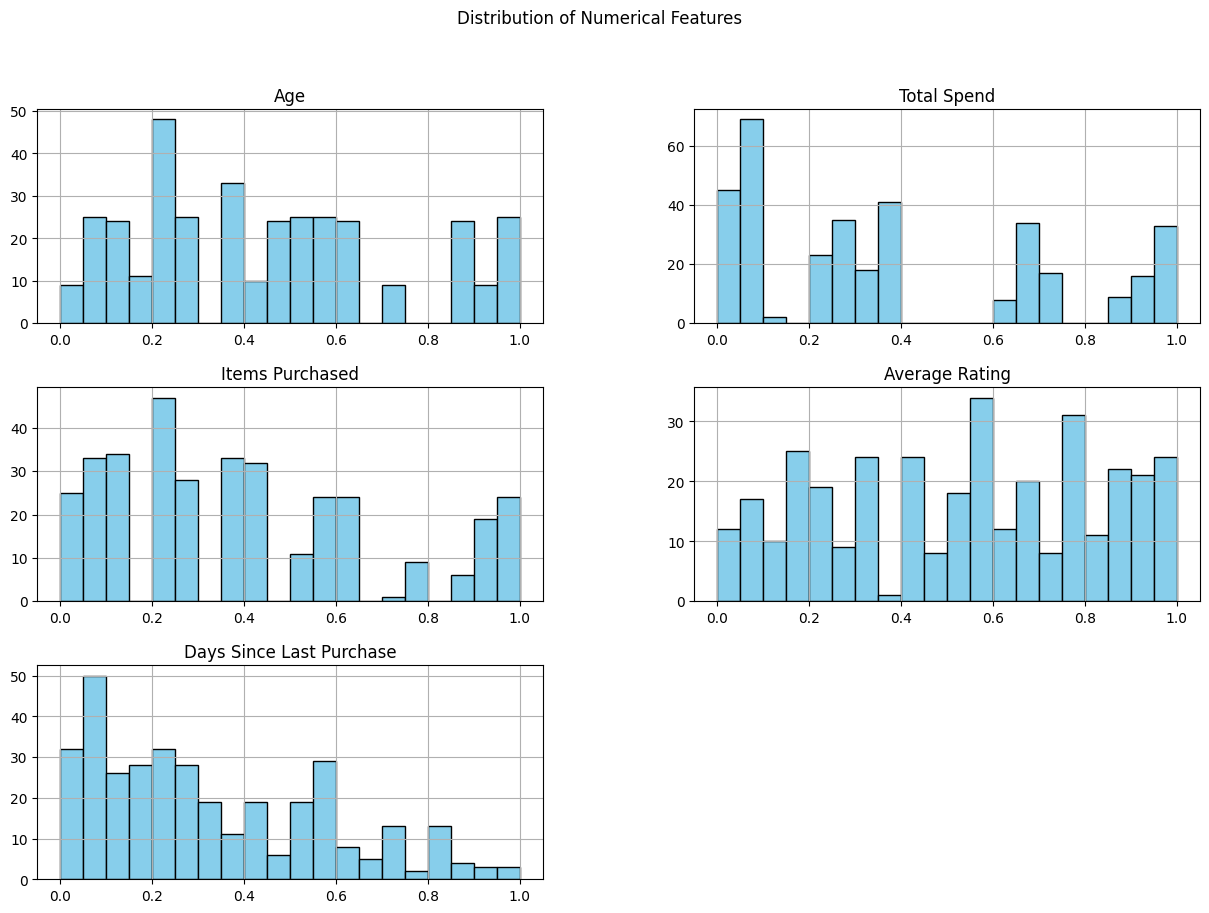


Analyzing Gender distribution...


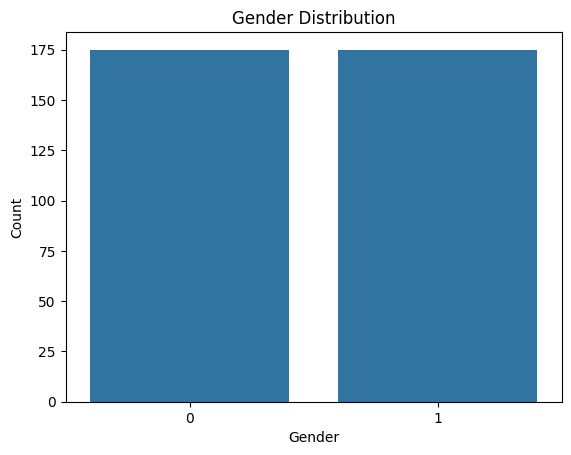


Analyzing Membership Type distribution...


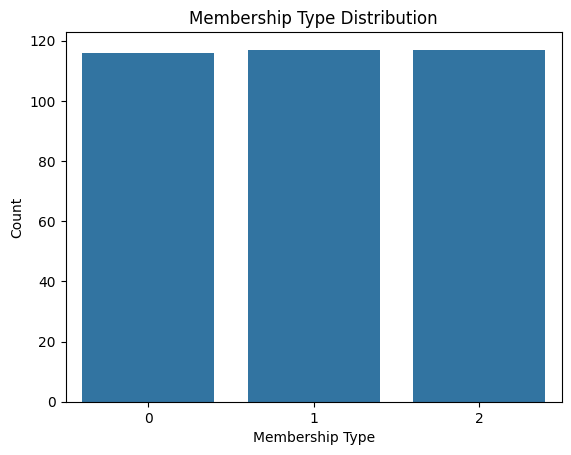


Boxplot: Total Spend vs Satisfaction Level...


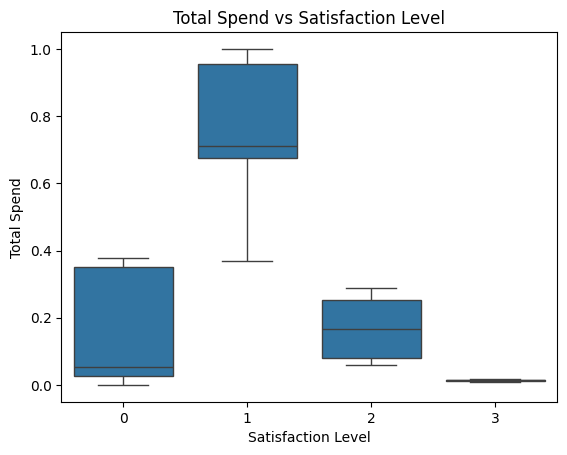


Pairplot for feature relationships...


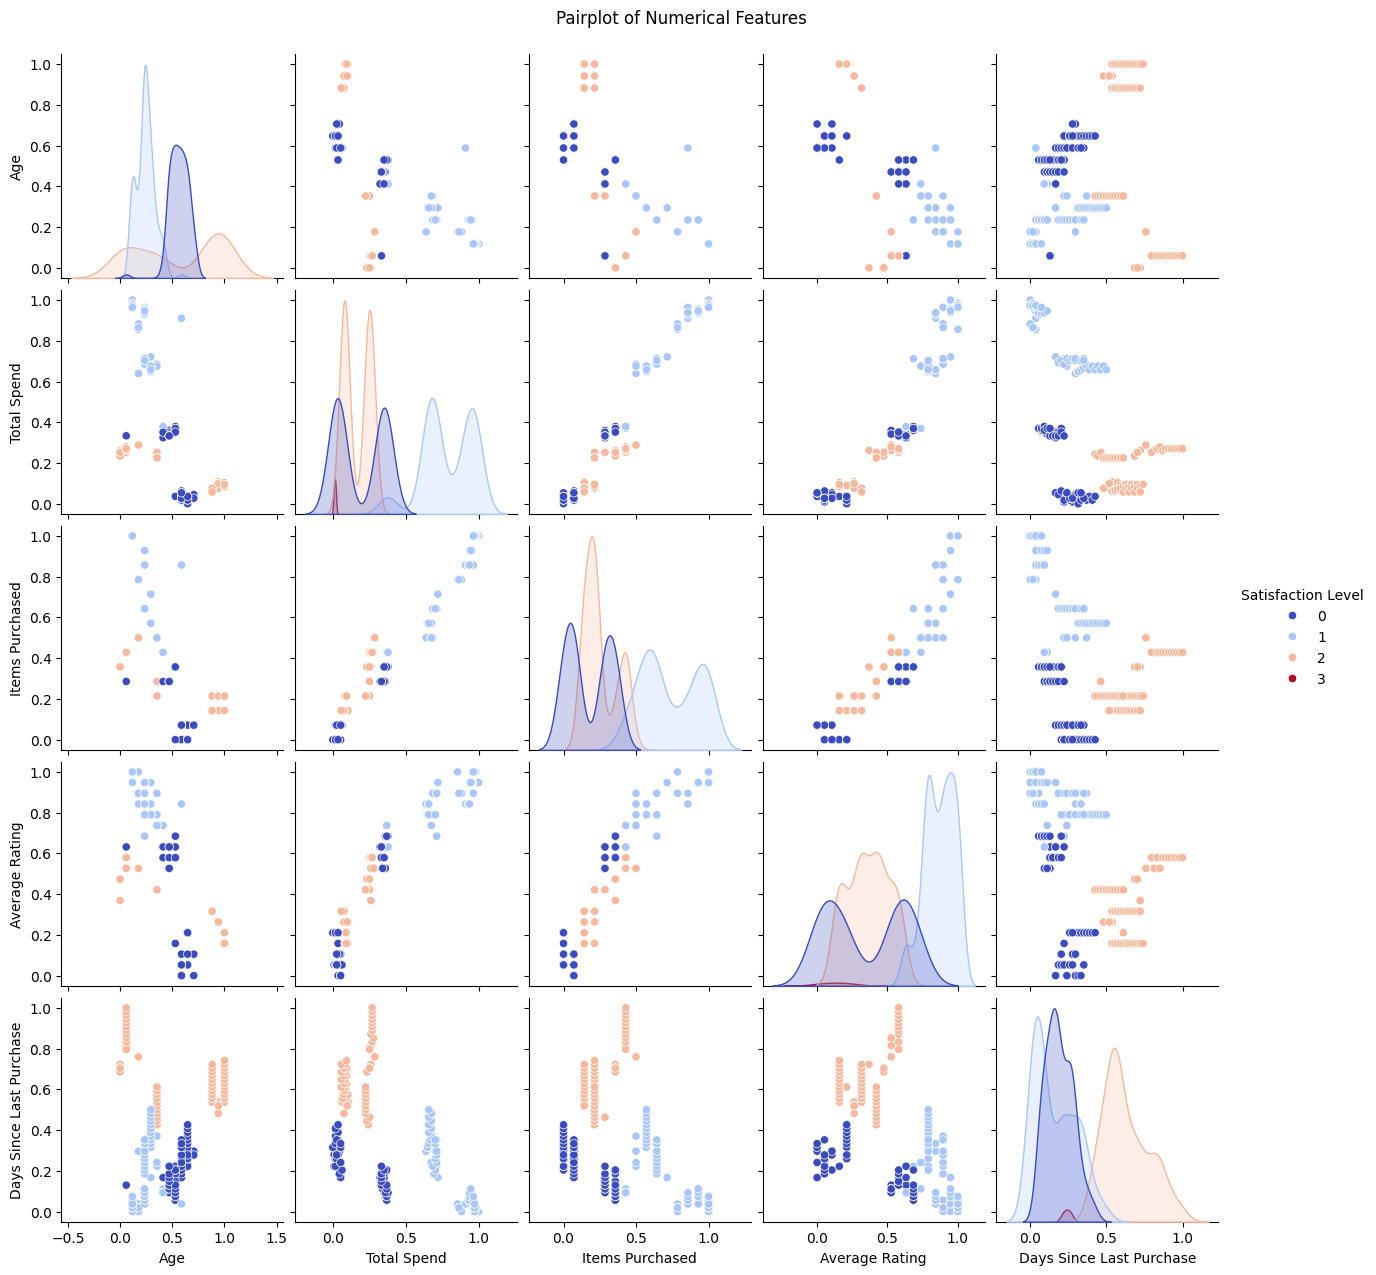

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Basic statistics
print("Basic statistics of the dataset:")
print(data.describe())

# Step 2: Correlation heatmap
print("\nVisualizing correlation matrix...")
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 3: Distribution of Target Variable (Satisfaction Level)
print("\nDistribution of Satisfaction Level:")
sns.countplot(x='Satisfaction Level', data=data)
plt.title("Satisfaction Level Distribution")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

# Step 4: Distribution of Numerical Features
print("\nVisualizing distribution of numerical features...")
numerical_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
data[numerical_features].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Step 5: Analysis of Categorical Variables
print("\nAnalyzing Gender distribution...")
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print("\nAnalyzing Membership Type distribution...")
sns.countplot(x='Membership Type', data=data)
plt.title("Membership Type Distribution")
plt.xlabel("Membership Type")
plt.ylabel("Count")
plt.show()

# Step 6: Boxplot for Total Spend by Satisfaction Level
print("\nBoxplot: Total Spend vs Satisfaction Level...")
sns.boxplot(x='Satisfaction Level', y='Total Spend', data=data)
plt.title("Total Spend vs Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Total Spend")
plt.show()

# Step 7: Pairplot for Relationships Between Features
print("\nPairplot for feature relationships...")
sns.pairplot(data, vars=numerical_features, hue='Satisfaction Level', palette='coolwarm')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


**Model Implementation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Prepare feature (Age) and target (Purchase Likelihood)
X_age = data[['Age']]  # Feature: Age
y_purchase = (data['Items Purchased'] > 0).astype(int)  # Target: Purchased = 1, Not Purchased = 0

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_age, y_purchase, test_size=0.2, random_state=42)

# Build neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=1),  # Input layer
    Dense(32, activation='relu'),              # Hidden layer
    Dense(1, activation='sigmoid')             # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
results = model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Make predictions
predictions = model.predict(X_test)
print(predictions[:5])  # Display first 5 predictions

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9160 - loss: 0.6417 - val_accuracy: 0.9464 - val_loss: 0.5893
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9104 - loss: 0.5924 - val_accuracy: 0.9464 - val_loss: 0.5289
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9216 - loss: 0.5359 - val_accuracy: 0.9464 - val_loss: 0.4751
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9141 - loss: 0.4834 - val_accuracy: 0.9464 - val_loss: 0.4234
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9327 - loss: 0.4253 - val_accuracy: 0.9464 - val_loss: 0.3778
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9310 - loss: 0.3901 - val_accuracy: 0.9464 - val_loss: 0.3410
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9375 - loss: 0.3499 - val_accuracy: 0.9464 - val_loss: 0.3133
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9388 - loss: 0.3280 - val_accuracy: 0.9464 - val_loss: 0.2931
Epoch 9/10
7/7 ━━━

**Neural Network Implementation for Geographic Prediction**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [ ]:
data.columns = data.columns.str.strip()  # Remove any extra spaces in column names

# Encode Membership Type (Target)
membership_encoder = LabelEncoder()
data['Membership Type Encoded'] = membership_encoder.fit_transform(data['Membership Type'])


In [ ]:
# One-hot encode City (Feature)
if 'City' in data.columns:
    data = pd.get_dummies(data, columns=['City'], drop_first=True)
else:
    raise KeyError("The 'City' column is missing from the dataset.")

# Prepare features (City) and target (Membership Type)
X_geo = data.filter(like='City_', axis=1)  # All one-hot encoded city columns
y_membership = data['Membership Type Encoded']  # Target: Membership Type

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_geo, y_membership, test_size=0.2, random_state=42)

# Build neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_geo.shape[1]),  # Input layer (based on number of cities)
    Dense(32, activation='relu'),                           # Hidden layer
    Dense(3, activation='softmax')                          # Output layer (3 classes for Membership Type)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
results = model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Make predictions
predictions = model.predict(X_test)
print(predictions[:5])  # Display first 5 predictions

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4280 - loss: 1.1157 - val_accuracy: 0.7321 - val_loss: 1.0467
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6927 - loss: 1.0311 - val_accuracy: 0.7321 - val_loss: 0.9882
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7914 - loss: 0.9764 - val_accuracy: 0.8929 - val_loss: 0.9401
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8595 - loss: 0.9350 - val_accuracy: 1.0000 - val_loss: 0.8895
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.8710 - val_accuracy: 1.0000 - val_loss: 0.8350
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.8224 - val_accuracy: 1.0000 - val_loss: 0.7762
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.7619 - val_accuracy: 1.0000 - val_loss: 0.7145
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.6873 - val_accuracy: 1.0000 - val_loss: 0.6502
Epoch 9/10
7/7

**Predict Total Spend**

In [ ]:
# Step 1: Prepare features and target
X_spend = data[['Age', 'Gender', 'Membership Type Encoded']]  # Features
y_spend = data['Total Spend']  # Target

# Encode Gender (if not already done)
if 'Gender' not in label_encoders:
    label_encoders['Gender'] = LabelEncoder()
    X_spend['Gender'] = label_encoders['Gender'].fit_transform(X_spend['Gender'])
else:
    # If 'Gender' is already in label_encoders, use the existing encoder
    X_spend['Gender'] = label_encoders['Gender'].transform(X_spend['Gender'])

# Ensure all features are of numeric type
X_spend = X_spend.astype(float) # Convert all columns to float

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_spend, y_spend, test_size=0.2, random_state=42)

# Step 3: Build neural network model for regression
model_spend = Sequential([
    Dense(64, activation='relu', input_dim=X_spend.shape[1]),  # Input layer
    Dense(32, activation='relu'),                             # Hidden layer
    Dense(1, activation='linear')                             # Output layer for regression
])

# Compile the model
model_spend.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model_spend.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
results = model_spend.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}, Test MAE: {results[1]}")

# Make predictions
predictions = model_spend.predict(X_test)
print(predictions[:5])  # Display first 5 predictions

Epoch 1/10


<ipython-input-21-71b1e3898faf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_spend['Gender'] = label_encoders['Gender'].transform(X_spend['Gender'])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 777248.3125 - mae: 804.7538 - val_loss: 771454.1250 - val_mae: 817.4648
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 807627.8750 - mae: 823.1814 - val_loss: 766471.3750 - val_mae: 814.2897
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 796870.1875 - mae: 813.9637 - val_loss: 761502.8125 - val_mae: 811.1182
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 783504.2500 - mae: 810.9042 - val_loss: 756608.8125 - val_mae: 807.9725
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 776577.0000 - mae: 798.4382 - val_loss: 751142.0625 - val_mae: 804.4534
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 864659.5000 - mae: 849.6196 - val_loss: 744807.4375 - val_mae: 800.3553
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 759799.5000 - mae: 798.8710 - val_loss: 737604.8125 - val_mae: 795.6689
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 874301.7500 - mae: 852.3753 - val_loss: 729222.0000 - val_

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[47.220898]
 [41.17108 ]
 [36.925976]
 [44.647167]
 [48.287243]]


**Hybrid Recommendation System**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate

data = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

# Ensure column names are clean
data.columns = data.columns.str.strip()

# Encode categorical columns
label_encoders = {}

# Encode Membership Type
label_encoders['Membership Type'] = LabelEncoder()
data['Membership Type Encoded'] = label_encoders['Membership Type'].fit_transform(data['Membership Type'])

# Encode Satisfaction Level
label_encoders['Satisfaction Level'] = LabelEncoder()
data['Satisfaction Level'] = label_encoders['Satisfaction Level'].fit_transform(data['Satisfaction Level'])

# Prepare data for hybrid model
X_hybrid = data[['Age', 'Average Rating', 'Membership Type Encoded']]  # Additional features
y_hybrid = data['Satisfaction Level']  # Target variable

# Prepare user and item inputs
X_user = data['Customer ID'].values  # User IDs
X_item = data['Items Purchased'].values  # Item IDs

# Normalize User and Item IDs
X_user -= X_user.min()
X_item -= X_item.min()

# Convert user and item IDs to numeric (int32)
X_user = X_user.astype(np.int32)
X_item = X_item.astype(np.int32)

# Split additional features and target
X_train_add, X_test_add, y_train_add, y_test_add = train_test_split(X_hybrid, y_hybrid, test_size=0.2, random_state=42)

# Convert additional features and target to float32
X_train_add = X_train_add.astype(np.float32)
X_test_add = X_test_add.astype(np.float32)
y_train_add = y_train_add.astype(np.float32)
y_test_add = y_test_add.astype(np.float32)

# Build the hybrid recommendation model
embedding_dim = 50

# Adjust embedding layer dimensions
num_users = X_user.max() + 1
num_items = X_item.max() + 1

# User and Item Inputs
user_input = Input(shape=(1,), name='User_Input')
item_input = Input(shape=(1,), name='Item_Input')
additional_input = Input(shape=(X_hybrid.shape[1],), name='Additional_Input')

# Embeddings
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='User_Embedding')(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='Item_Embedding')(item_input)

# Flatten embeddings
user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

# Concatenate embeddings and additional features
concat = Concatenate()([user_vec, item_vec, additional_input])

# Dense Layers
x = Dense(128, activation='relu')(concat)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid', name='Output')(x)  # Binary classification

# Compile model
hybrid_model = Model(inputs=[user_input, item_input, additional_input], outputs=output)
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
print(hybrid_model.summary())

# Train the model
hybrid_model.fit(
    [X_user[:len(X_train_add)], X_item[:len(X_train_add)], X_train_add],
    y_train_add,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

# Evaluate the model
results = hybrid_model.evaluate([X_user[len(X_train_add):], X_item[len(X_train_add):], X_test_add], y_test_add)
print(f"Hybrid Model Loss: {results[0]}, Accuracy: {results[1]}")

# Make predictions
predictions = hybrid_model.predict([X_user[len(X_train_add):], X_item[len(X_train_add):], X_test_add])
print(predictions[:5])  # Display first 5 predictions


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ User_Input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Item_Input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ User_Embedding            │ (None, 1, 50)          │         17,500 │ User_Input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Item_Embedding            │ (None, 1, 50)          │            750 │ Item_Input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_12 (Flatten)      │ (None, 50)             │              0 │ User_Embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_13 (Flatten)      │ (None, 50)             │              0 │ Item_Embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Additional_Input          │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 103)            │              0 │ flatten_12[0][0],      │
│ (Concatenate)             │                        │                │ flatten_13[0][0],      │
│                           │                        │                │ Additional_Input[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 128)            │         13,312 │ concatenate_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 64)             │          8,256 │ dense_27[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Output (Dense)            │ (None, 1)              │             65 │ dense_28[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 39,883 (155.79 KB)

 Trainable params: 39,883 (155.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.2903 - loss: 1.9910 - val_accuracy: 0.3214 - val_loss: -0.5008
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3435 - loss: -0.3491 - val_accuracy: 0.3214 - val_loss: -0.9511
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3416 - loss: -0.4628 - val_accuracy: 0.3214 - val_loss: -1.2519
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3486 - loss: -0.6763 - val_accuracy: 0.3214 - val_loss: -1.5295
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3257 - loss: -0.7740 - val_accuracy: 0.3214 - val_loss: -1.7685
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3964 - loss: -1.0346 - val_accuracy: 0.3214 - val_loss: -2.0411
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3358 - loss: -0.6655 - val_accuracy: 0.3214 - val_loss: -2.2586
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3542 - loss: -1.0175 - val_accuracy: 0.3214 

**K-measn Clustering**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 188895.6250 - val_loss: 104975.7422
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 84551.9062 - val_loss: 7362.5615
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8321.5068 - val_loss: 7884.8867
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4817.0698 - val_loss: 4117.9282
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3375.5771 - val_loss: 212.0560
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 541.7257 - val_loss: 545.7543
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 337.5290 - val_loss: 346.0186
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 285.3027 - val_loss: 137.5323
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 134.9433 - val_loss: 90.8326
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 95.7677 - val_loss: 85.4578
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


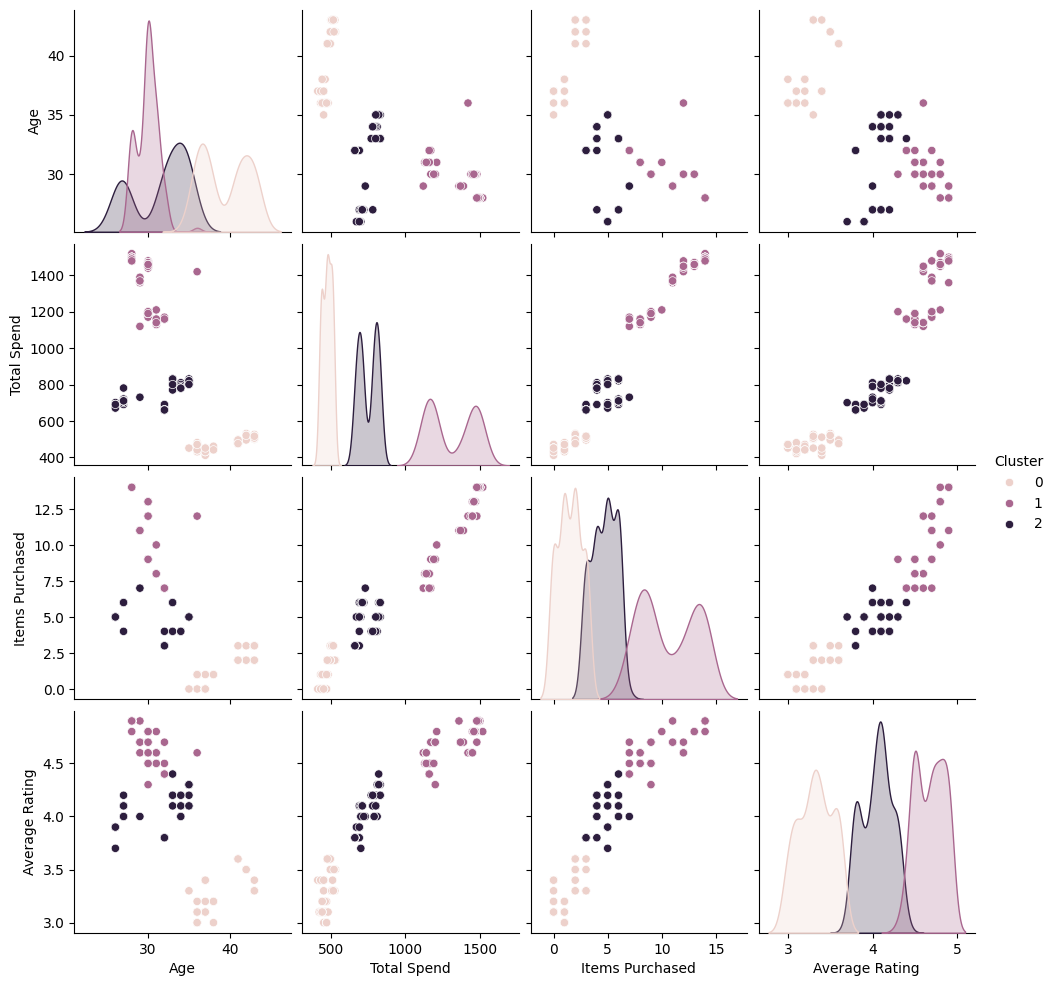

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Prepare features
X_cluster = data[['Age', 'Total Spend', 'Items Purchased', 'Average Rating']]

# Step 2: Build Autoencoder
autoencoder = Sequential([
    Dense(128, activation='relu', input_dim=X_cluster.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(X_cluster.shape[1], activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_cluster, X_cluster, epochs=10, batch_size=32, validation_split=0.2)

# Step 3: Extract encoded features
encoded_model = Sequential(autoencoder.layers[:-1])  # Use encoder part only
encoded_features = encoded_model.predict(X_cluster)

# Step 4: Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(encoded_features)

# Step 5: Add clusters to dataset and visualize
data['Cluster'] = clusters
sns.pairplot(data, hue='Cluster', vars=['Age', 'Total Spend', 'Items Purchased', 'Average Rating'])
plt.show()


**Evaluation Metrics**

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy: 0.3286
Precision (Weighted): 0.1080
Recall (Weighted): 0.3286
F1-Score (Weighted): 0.1625


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


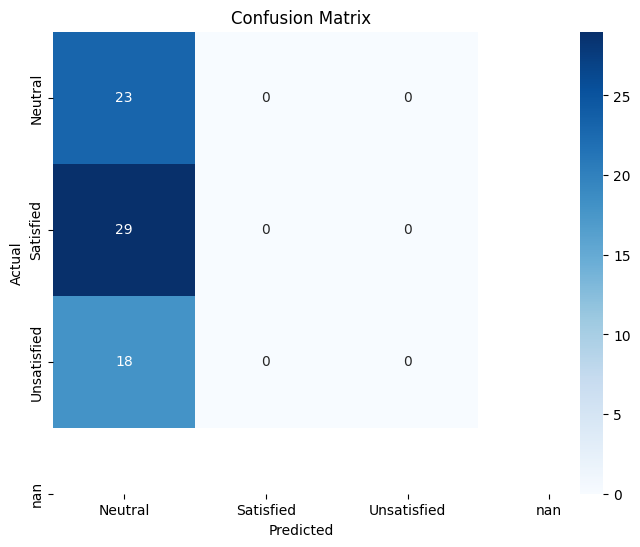

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate Predictions
predicted_probs = hybrid_model.predict([X_user[len(X_train_add):], X_item[len(X_train_add):], X_test_add])
predicted_classes = predicted_probs.argmax(axis=1)  # Convert probabilities to class indices for multi-class

# Step 2: Compute Metrics for Multi-Class
accuracy = accuracy_score(y_test_add, predicted_classes)
precision = precision_score(y_test_add, predicted_classes, average='weighted')
recall = recall_score(y_test_add, predicted_classes, average='weighted')
f1 = f1_score(y_test_add, predicted_classes, average='weighted')

# Step 3: Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1-Score (Weighted): {f1:.4f}")

# Step 4: Confusion Matrix
conf_matrix = confusion_matrix(y_test_add, predicted_classes)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders['Satisfaction Level'].classes_, yticklabels=label_encoders['Satisfaction Level'].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
